In [1]:
# pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [20]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [21]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [22]:
google_data.shape

(4956, 6)

In [23]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4.956000e+03
mean,43.538379,44.000053,43.101462,43.560552,43.560552,1.170169e+08
std,40.886772,41.349717,40.480466,40.924852,40.924852,1.503398e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.940932,13.090123,12.816710,12.950147,12.950147,2.789150e+07
50%,26.842399,27.023058,26.614978,26.834164,26.834164,5.815316e+07
75%,59.175001,59.742376,58.592625,59.251624,59.251624,1.450055e+08
max,175.990005,176.419998,171.399994,173.690002,173.690002,1.650833e+09


In [24]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-08-19 to 2024-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4956 non-null   float64
 1   High       4956 non-null   float64
 2   Low        4956 non-null   float64
 3   Close      4956 non-null   float64
 4   Adj Close  4956 non-null   float64
 5   Volume     4956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.0 KB


In [25]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

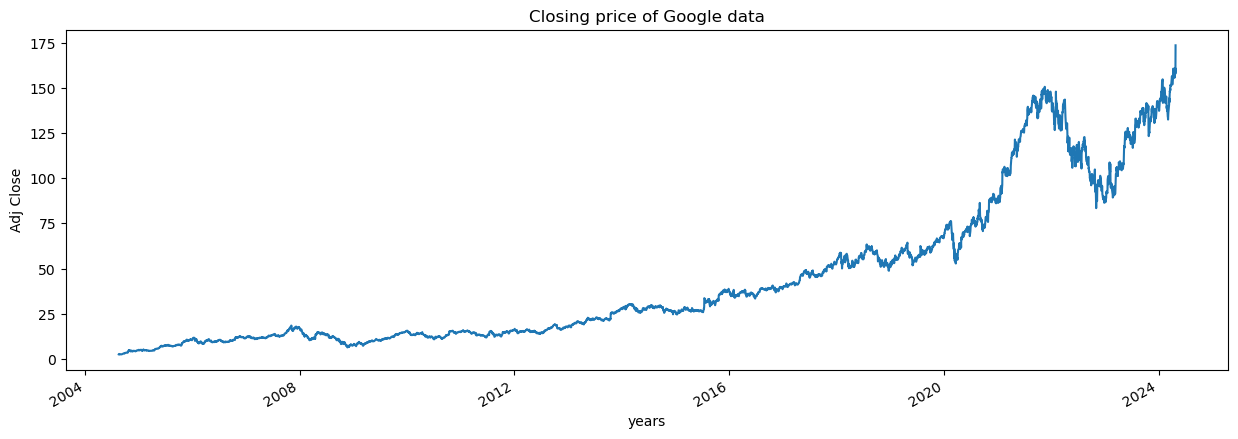

In [27]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [28]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [29]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

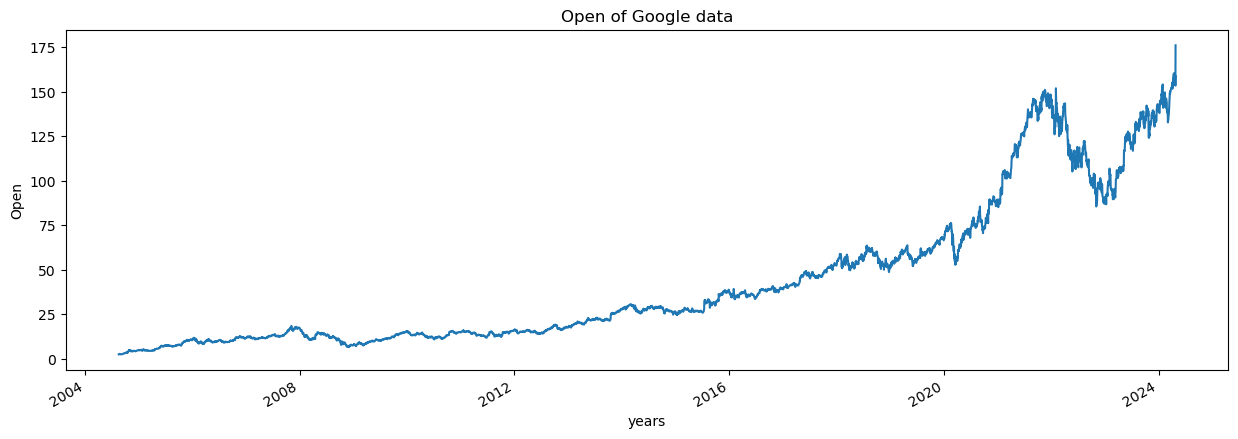

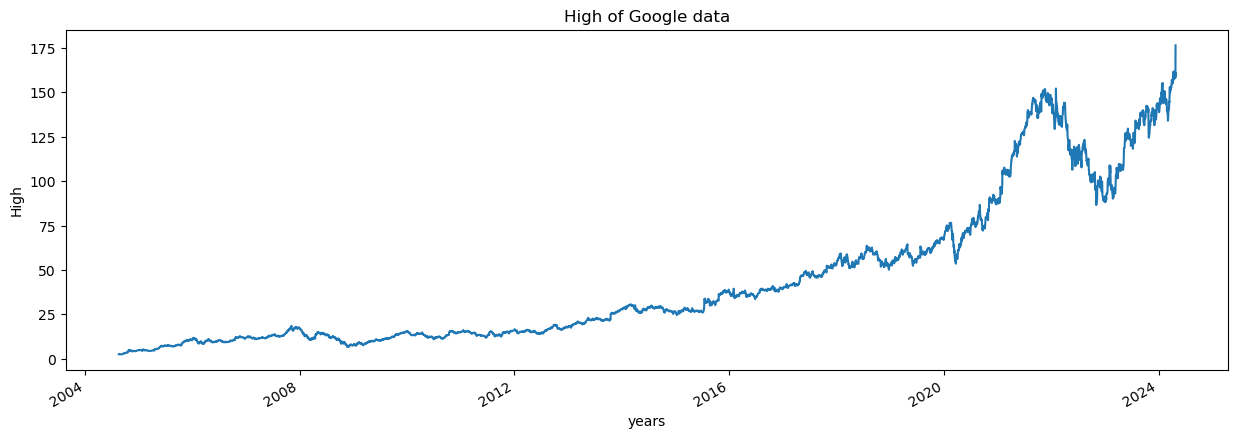

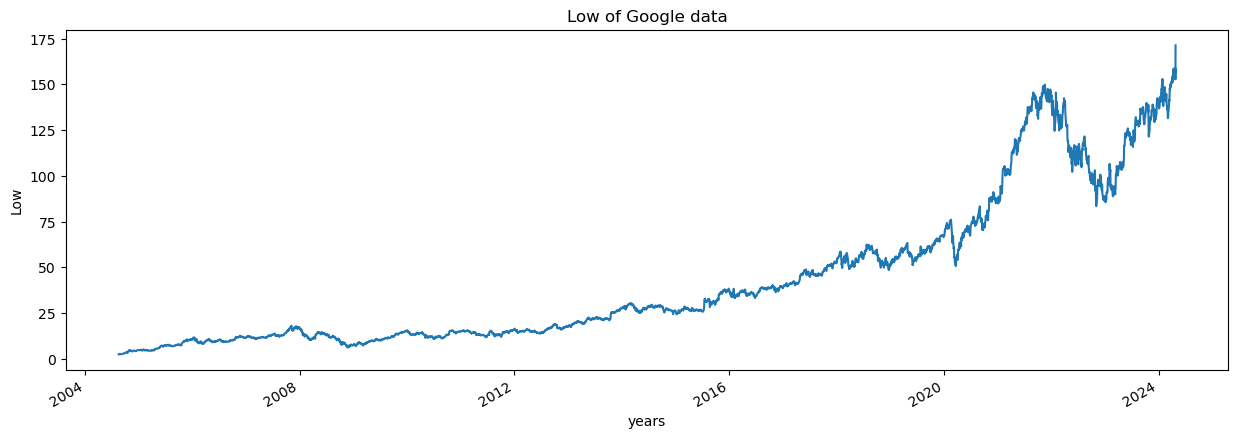

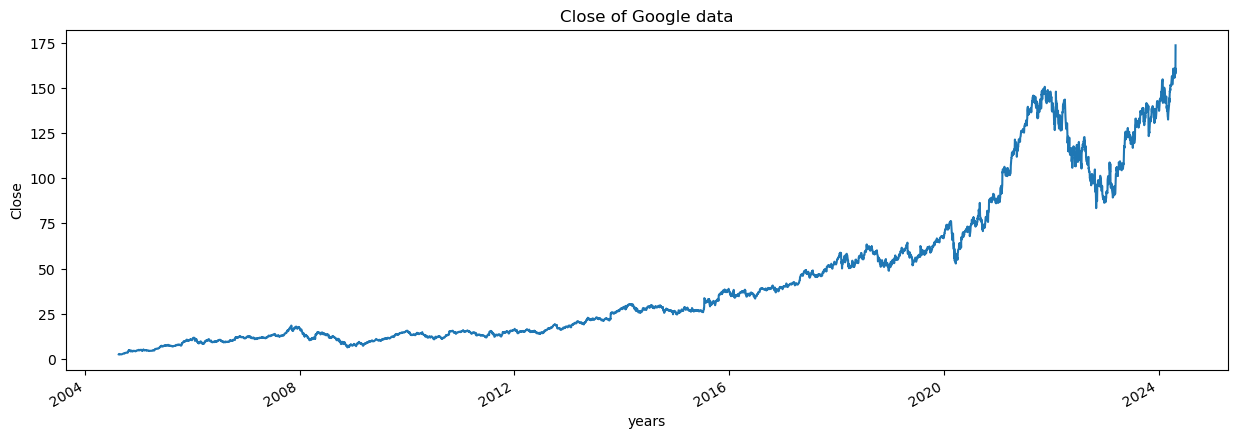

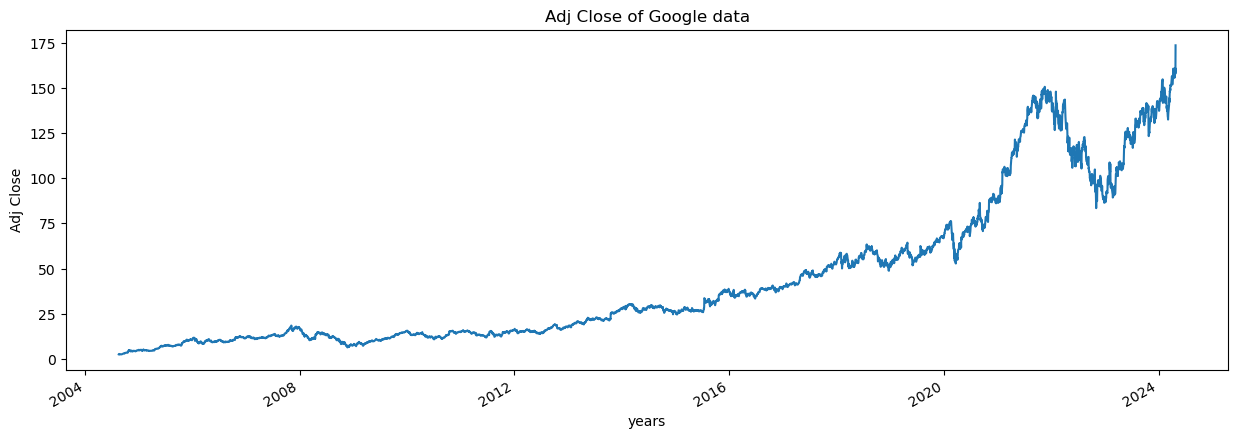

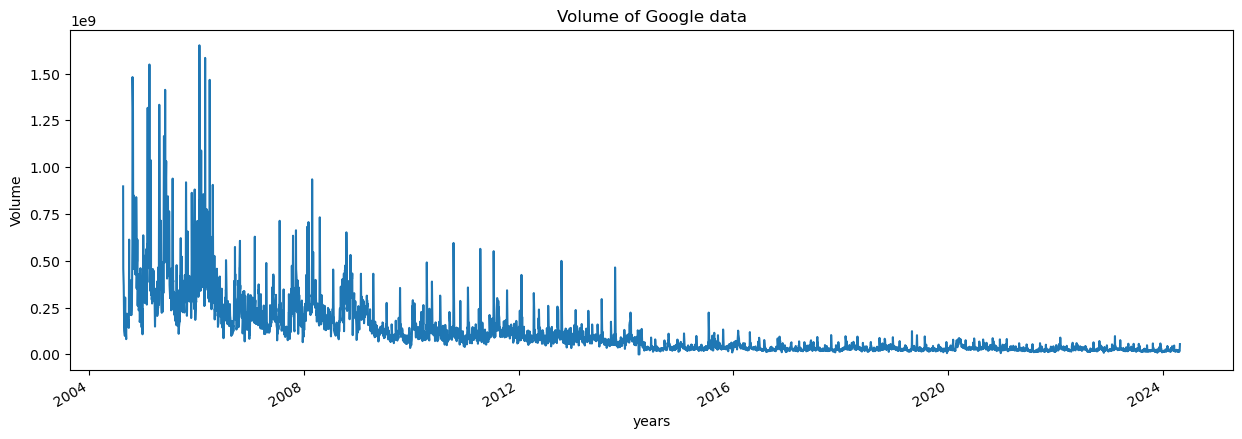

In [30]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [31]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [32]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [33]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [34]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [35]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 81


In [36]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [37]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.034039
Name: MA_for_250_days, dtype: float64

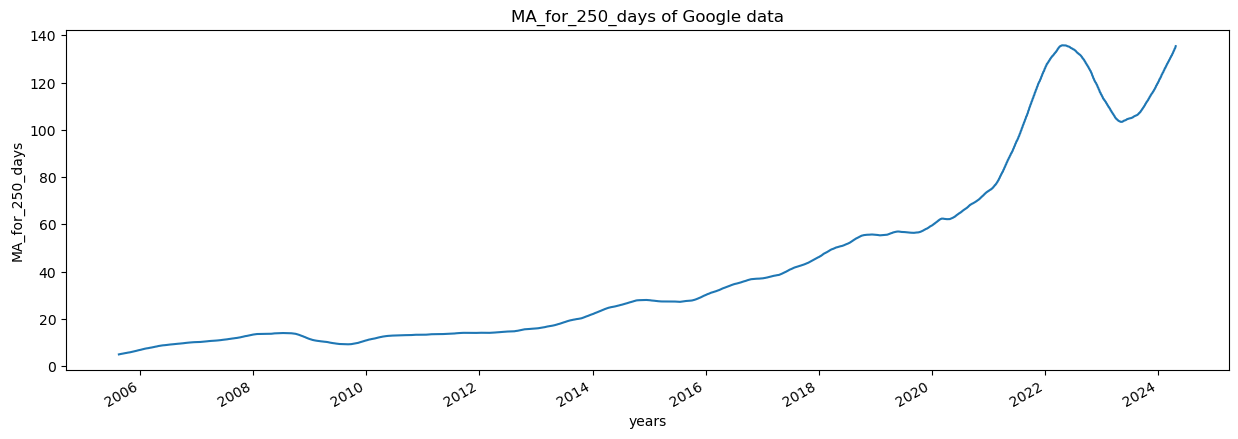

In [38]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

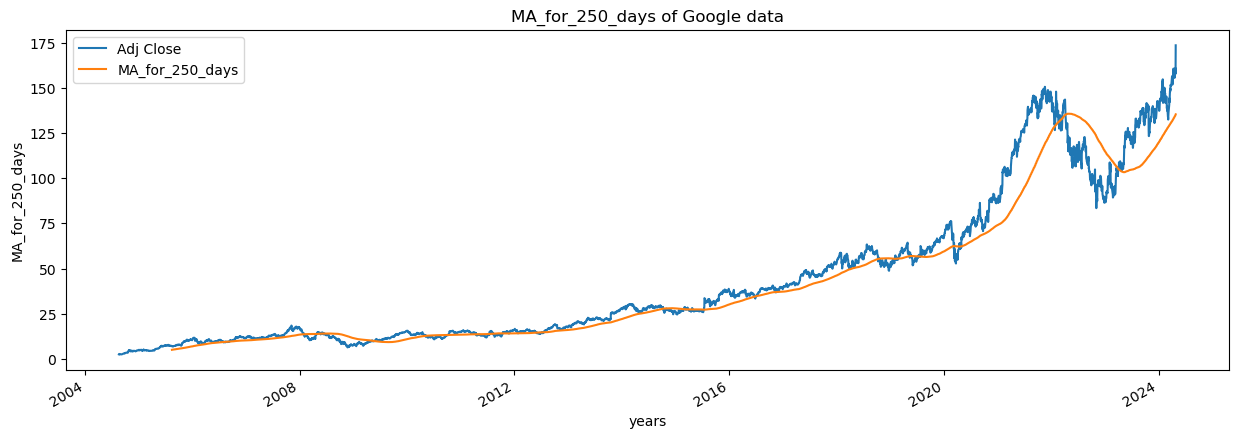

In [39]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

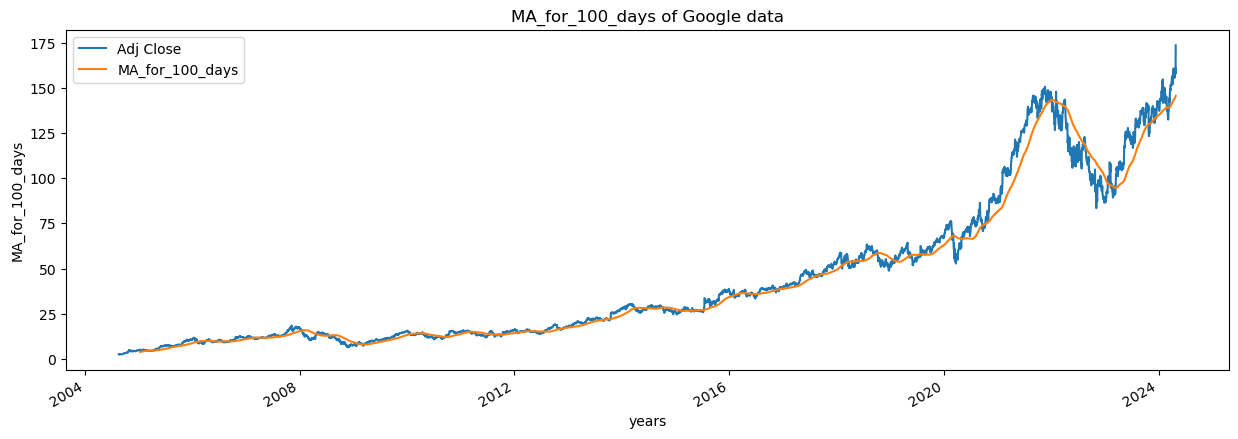

In [40]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

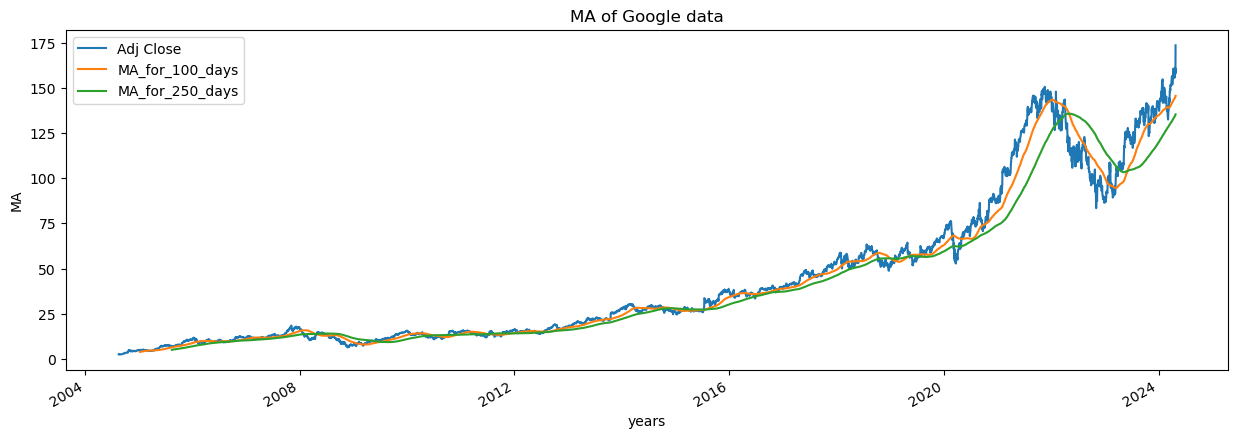

In [41]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [42]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.499133,NaN
2004-08-20,2.697639,0.079430
2004-08-23,2.724787,0.010064
2004-08-24,2.611960,-0.041408
2004-08-25,2.640104,0.010775


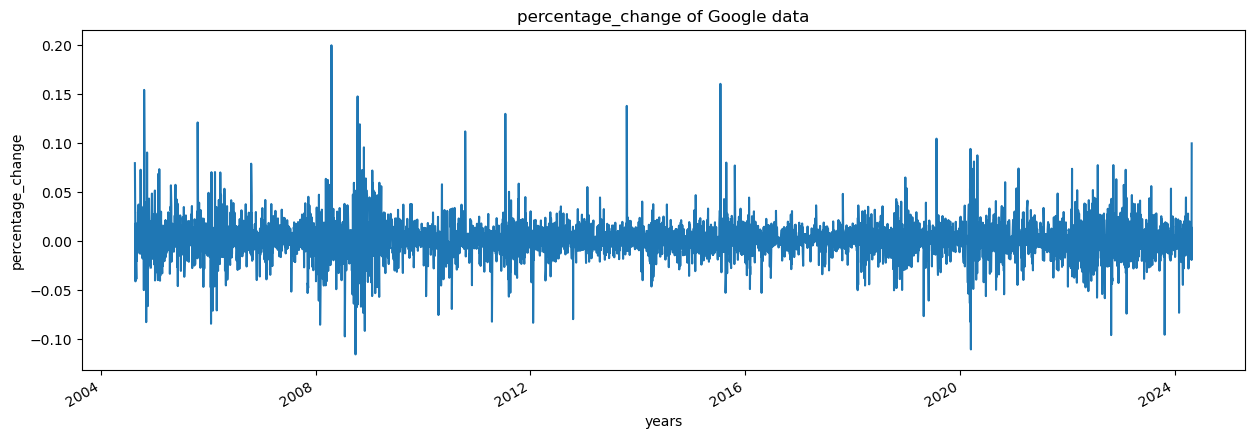

In [43]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [44]:
Adj_close_price = google_data[['Adj Close']]

In [45]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([173.69000244]), array([2.49091291]))

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.80154176e-05],
       [1.20751854e-03],
       [1.36609420e-03],
       ...,
       [9.26459911e-01],
       [9.08060227e-01],
       [1.00000000e+00]])

In [47]:
len(scaled_data)

4956

In [48]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [49]:
x_data[0],y_data[0]

(array([[4.80154176e-05],
        [1.20751854e-03],
        [1.36609420e-03],
        [7.07054110e-04],
        [8.71448216e-04],
        [1.14932293e-03],
        [8.93270874e-04],
        [2.90971091e-04],
        [3.43344077e-04],
        [3.49190376e-05],
        [2.18226577e-04],
        [0.00000000e+00],
        [2.28412341e-04],
        [3.33162491e-04],
        [3.34616406e-04],
        [7.73975999e-04],
        [1.08967340e-03],
        [1.67015610e-03],
        [1.74435035e-03],
        [2.03095134e-03],
        [2.54305683e-03],
        [2.81510892e-03],
        [2.59397451e-03],
        [2.67253190e-03],
        [3.02751705e-03],
        [2.88348612e-03],
        [2.65507935e-03],
        [3.90623624e-03],
        [4.52017709e-03],
        [4.30485974e-03],
        [4.73840228e-03],
        [5.09919752e-03],
        [5.58074851e-03],
        [5.39307783e-03],
        [5.65057962e-03],
        [5.48764082e-03],
        [5.12829811e-03],
        [5.43963237e-03],
        [5.9

In [50]:

int(len(x_data)*0.7)

3399

In [51]:
4908-100-int(len(x_data)*0.7)

1409

In [52]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3399, 100, 1)
(3399, 1)
(1457, 100, 1)
(1457, 1)


In [54]:
#LSTM

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [56]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 61s 17ms/step - loss: 2.1424e-04
Epoch 2/2
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 59s 17ms/step - loss: 5.5464e-05


In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [60]:
predictions = model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [61]:
predictions

array([[0.32006568],
       [0.323466  ],
       [0.32355934],
       ...,
       [0.8679165 ],
       [0.8768712 ],
       [0.8667058 ]], dtype=float32)

In [62]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.285862],
       [ 57.867996],
       [ 57.883976],
       ...,
       [151.07742 ],
       [152.61047 ],
       [150.87015 ]], dtype=float32)

In [63]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.44100189],
       [ 59.19300079],
       [ 59.93999863],
       ...,
       [161.1000061 ],
       [157.94999695],
       [173.69000244]])

In [64]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [65]:
rmse

4.633823051650304

In [66]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-07-13,59.441002,57.285862
2018-07-16,59.193001,57.867996
2018-07-17,59.939999,57.883976
2018-07-18,59.793999,58.195858
2018-07-19,59.348000,58.265278


<Figure size 640x480 with 0 Axes>

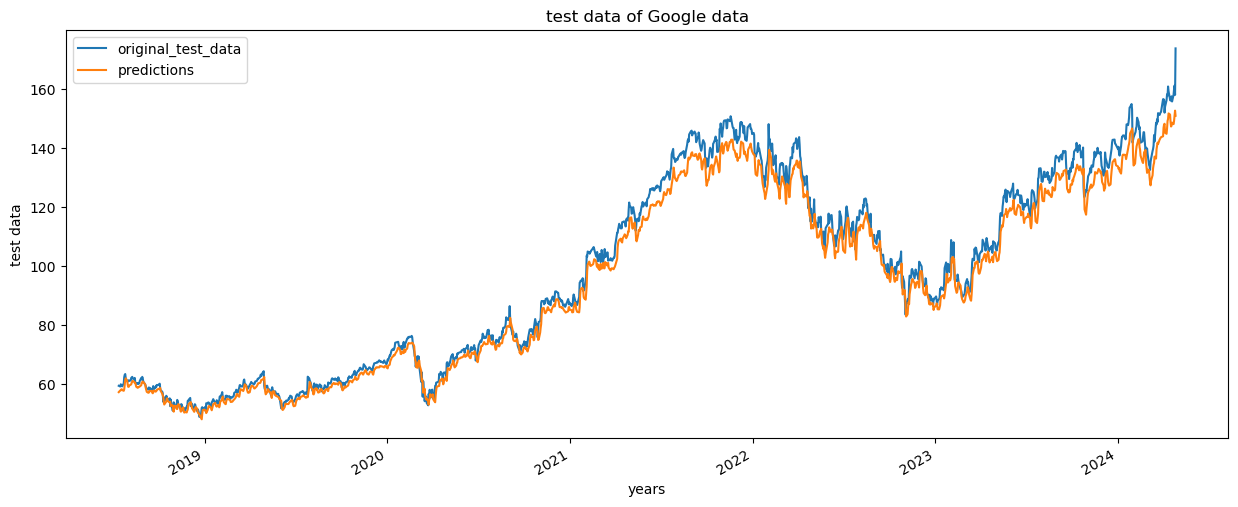

In [67]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

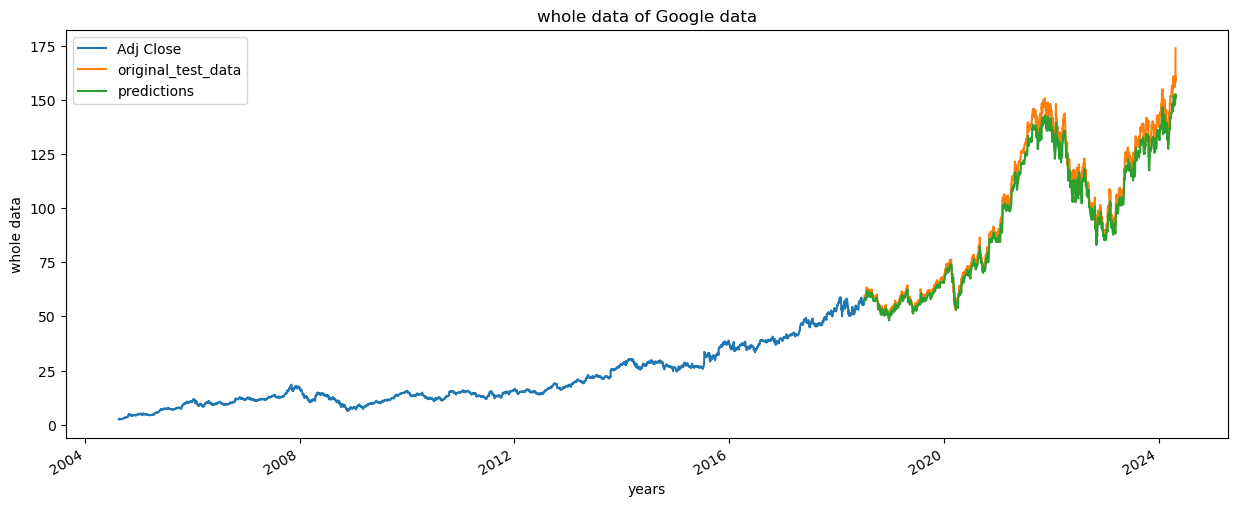

In [68]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [69]:
model.save("Latest_stock_price_model.keras")

RNN

In [70]:
from keras.layers import LSTM, Dense, SimpleRNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
rnn_model.add(SimpleRNN(64, return_sequences=False))
rnn_model.add(Dense(25))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3399/3399 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0041
Epoch 2/2
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0066


In [71]:
def evaluate_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    inv_predictions = scaler.inverse_transform(predictions)
    inv_y_test = scaler.inverse_transform(y_test)
    rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))
    
    return rmse

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rnn_rmse = evaluate_model(rnn_model, x_test, y_test)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [73]:
print("RNN RMSE:", rnn_rmse)

RNN RMSE: 64.56997887437663


In [74]:

mae = mean_absolute_error(inv_y_test, inv_predictions)
r2 = r2_score(inv_y_test, inv_predictions)

In [75]:
mae

3.7354551065270836

In [76]:
r2


0.9798097449837527

In [78]:
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=2)

predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

print("RMSE:", rmse)

Epoch 1/2


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3399/3399 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - loss: 2.4895e-04
Epoch 2/2
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 61s 18ms/step - loss: 6.7110e-05
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
RMSE: 2.0457156274024904
